# 데이터셋 불러오기

In [1]:
# data 불러오기
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdulwadood11220/netflix-customer-churn-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/netflix-customer-churn-dataset


In [2]:
# SEED 설정
SEED = 42

In [3]:
path += "/netflix_customer_churn.csv"

In [4]:
# csv 파일 읽기
import pandas as pd
df = pd.read_csv(path)
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


# 머신러닝 분석에 필요없는 컬럼제거
- customer_id

In [5]:
# 필요없는 컬럼제거: customer_id
df = df.drop(columns=['customer_id'], axis=1)
df

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19,Female,Basic,49.17,11,Europe,Desktop,8.99,0,Credit Card,4,4.10,Drama
4996,67,Female,Basic,9.24,2,North America,Desktop,8.99,0,PayPal,3,3.08,Documentary
4997,66,Male,Standard,16.55,49,South America,Desktop,13.99,1,Debit Card,2,0.33,Action
4998,59,Female,Basic,9.12,3,Europe,Laptop,8.99,0,Credit Card,4,2.28,Sci-Fi


# 머신러닝을 위한 target과 feature 나누기
- 고객 이탈(churned)을 예측하기 위함
- target: churned, features: 나머지 12개 columns

In [6]:
# target과 나머지 features로 분류
target = df['churned']
features = df.drop(columns=['churned'], axis=1)
features.shape

(5000, 12)

In [7]:
target.shape

(5000,)

# target의 0과 1개수 파악하기

In [8]:
# target 데이터의 0과 1의 개수 파악
target.value_counts()

,count
churned,
1,2515
0,2485


- churned데이터의 개수가 2500개와 큰 차이가 없음
- 별도의 데이터 축소 작업은 하지 않음

# train_test_split 진행
- 앞으로의 random_state는 42로 설정
- 성능에 따라 test_size는 조정가능

In [9]:
# target과 features에 대해서 train_test_split 진행
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=SEED, stratify=target)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 12), (1000, 12), (4000,), (1000,))

In [10]:
# 인덱스 초기화
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_train

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,23,Female,Premium,4.03,3,North America,Mobile,17.99,PayPal,5,1.01,Romance
1,20,Male,Standard,2.89,13,South America,Desktop,13.99,Debit Card,2,0.21,Sci-Fi
2,18,Female,Basic,7.65,49,Europe,Desktop,8.99,Debit Card,1,0.15,Drama
3,19,Other,Basic,5.18,43,Europe,Tablet,8.99,PayPal,4,0.12,Horror
4,19,Female,Standard,1.68,6,North America,Laptop,13.99,Credit Card,3,0.24,Documentary
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,51,Other,Standard,2.68,48,Asia,Laptop,13.99,Crypto,3,0.05,Comedy
3996,32,Female,Standard,52.67,34,Asia,Laptop,13.99,Gift Card,3,1.50,Sci-Fi
3997,67,Other,Standard,10.24,11,South America,Desktop,13.99,Debit Card,2,0.85,Romance
3998,39,Other,Premium,7.99,50,Asia,Mobile,17.99,PayPal,3,0.16,Drama


# train과 test데이터에 대한 결측치 확인

In [11]:
# X_train 정보확인
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     4000 non-null   int64  
 1   gender                  4000 non-null   object 
 2   subscription_type       4000 non-null   object 
 3   watch_hours             4000 non-null   float64
 4   last_login_days         4000 non-null   int64  
 5   region                  4000 non-null   object 
 6   device                  4000 non-null   object 
 7   monthly_fee             4000 non-null   float64
 8   payment_method          4000 non-null   object 
 9   number_of_profiles      4000 non-null   int64  
 10  avg_watch_time_per_day  4000 non-null   float64
 11  favorite_genre          4000 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 375.1+ KB


In [12]:
# X_test 정보확인
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1000 non-null   int64  
 1   gender                  1000 non-null   object 
 2   subscription_type       1000 non-null   object 
 3   watch_hours             1000 non-null   float64
 4   last_login_days         1000 non-null   int64  
 5   region                  1000 non-null   object 
 6   device                  1000 non-null   object 
 7   monthly_fee             1000 non-null   float64
 8   payment_method          1000 non-null   object 
 9   number_of_profiles      1000 non-null   int64  
 10  avg_watch_time_per_day  1000 non-null   float64
 11  favorite_genre          1000 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


# train, test 데이터셋 분석 결과
- train, test 모두 결측치(null)없음
- 수치형 데이터: age, watch_hours, last_login_days, monthly_fee, number_of_profiles, avg_watch_time_per_day
- 문자형(카테고리) 데이터: gender, subscription_type, region, device, payment_method, favorite_genre

# 모델 적용을 위한 전처리

## 문자열 데이터: One hot Encoding이용

In [13]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = X_train.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])
categorical_features

Index(['gender', 'subscription_type', 'region', 'device', 'payment_method',
       'favorite_genre'],
      dtype='object')

In [14]:
# X_train, X_test에 one hot encoding 적용
train_enc = pd.DataFrame(X_train_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_features))
test_enc = pd.DataFrame(X_test_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_features))
train_enc

,gender_Female,gender_Male,gender_Other,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,region_Africa,region_Asia,region_Europe,region_North America,...,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Action,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3998,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
test_enc

,gender_Female,gender_Male,gender_Other,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,region_Africa,region_Asia,region_Europe,region_North America,...,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Action,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
997,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
998,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# encoding 데이터와 수치형 데이터 병합

In [16]:
# encoding 데이터와 수치형 데이터 병합
train_df = X_train.select_dtypes(include=['int64', 'float64']).join(train_enc)
test_df = X_test.select_dtypes(include=['int64', 'float64']).join(test_enc)
train_df

,age,watch_hours,last_login_days,monthly_fee,number_of_profiles,avg_watch_time_per_day,gender_Female,gender_Male,gender_Other,subscription_type_Basic,...,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Action,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,23,4.03,3,17.99,5,1.01,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,2.89,13,13.99,2,0.21,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,18,7.65,49,8.99,1,0.15,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,19,5.18,43,8.99,4,0.12,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,19,1.68,6,13.99,3,0.24,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,51,2.68,48,13.99,3,0.05,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3996,32,52.67,34,13.99,3,1.50,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3997,67,10.24,11,13.99,2,0.85,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3998,39,7.99,50,17.99,3,0.16,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
X_train

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,23,Female,Premium,4.03,3,North America,Mobile,17.99,PayPal,5,1.01,Romance
1,20,Male,Standard,2.89,13,South America,Desktop,13.99,Debit Card,2,0.21,Sci-Fi
2,18,Female,Basic,7.65,49,Europe,Desktop,8.99,Debit Card,1,0.15,Drama
3,19,Other,Basic,5.18,43,Europe,Tablet,8.99,PayPal,4,0.12,Horror
4,19,Female,Standard,1.68,6,North America,Laptop,13.99,Credit Card,3,0.24,Documentary
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,51,Other,Standard,2.68,48,Asia,Laptop,13.99,Crypto,3,0.05,Comedy
3996,32,Female,Standard,52.67,34,Asia,Laptop,13.99,Gift Card,3,1.50,Sci-Fi
3997,67,Other,Standard,10.24,11,South America,Desktop,13.99,Debit Card,2,0.85,Romance
3998,39,Other,Premium,7.99,50,Asia,Mobile,17.99,PayPal,3,0.16,Drama


## 수치형데이터: StandardScaler이용

In [18]:
# train_df, test_df에 StandardScaler적용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_df = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)
test_df = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)
train_df

,age,watch_hours,last_login_days,monthly_fee,number_of_profiles,avg_watch_time_per_day,gender_Female,gender_Male,gender_Other,subscription_type_Basic,...,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Action,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,-1.336313,-0.641884,-1.540040,1.166097,1.392519,0.046474,1.387846,-0.696658,-0.704192,-0.704589,...,-0.507022,-0.495699,1.957273,-0.39759,-0.405983,-0.411399,-0.415130,-0.410567,2.465694,-0.411399
1,-1.530110,-0.738665,-0.971796,0.082301,-0.726724,-0.245238,-0.720541,1.435425,-0.704192,-0.704589,...,1.972302,-0.495699,-0.510915,-0.39759,-0.405983,-0.411399,-0.415130,-0.410567,-0.405565,2.430733
2,-1.659308,-0.334563,1.073881,-1.272445,-1.433138,-0.267117,1.387846,-0.696658,-0.704192,1.419267,...,1.972302,-0.495699,-0.510915,-0.39759,-0.405983,-0.411399,2.408884,-0.410567,-0.405565,-0.411399
3,-1.594709,-0.544255,0.732935,-1.272445,0.686105,-0.278056,-0.720541,-0.696658,1.420067,1.419267,...,-0.507022,-0.495699,1.957273,-0.39759,-0.405983,-0.411399,-0.415130,2.435654,-0.405565,-0.411399
4,-1.594709,-0.841388,-1.369567,0.082301,-0.020309,-0.234299,1.387846,-0.696658,-0.704192,-0.704589,...,-0.507022,-0.495699,-0.510915,-0.39759,-0.405983,2.430733,-0.415130,-0.410567,-0.405565,-0.411399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.472462,-0.756493,1.017057,0.082301,-0.020309,-0.303581,-0.720541,-0.696658,1.420067,-0.704589,...,-0.507022,-0.495699,-0.510915,-0.39759,2.463156,-0.411399,-0.415130,-0.410567,-0.405565,-0.411399
3996,-0.754921,3.487422,0.221516,0.082301,-0.020309,0.225148,1.387846,-0.696658,-0.704192,-0.704589,...,-0.507022,2.017352,-0.510915,-0.39759,-0.405983,-0.411399,-0.415130,-0.410567,-0.405565,2.430733
3997,1.506047,-0.114685,-1.085445,0.082301,-0.726724,-0.011868,-0.720541,-0.696658,1.420067,-0.704589,...,1.972302,-0.495699,-0.510915,-0.39759,-0.405983,-0.411399,-0.415130,-0.410567,2.465694,-0.411399
3998,-0.302727,-0.305699,1.130706,1.166097,-0.020309,-0.263470,-0.720541,-0.696658,1.420067,-0.704589,...,-0.507022,-0.495699,1.957273,-0.39759,-0.405983,-0.411399,2.408884,-0.410567,-0.405565,-0.411399


# catboost 적용

In [19]:
# 결측치 확인
train_df.isnull().sum().sum(), test_df.isnull().sum().sum()

(np.int64(0), np.int64(0))

In [20]:
train_df.shape, test_df.shape

((4000, 35), (1000, 35))

In [21]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


In [22]:
from catboost import CatBoostClassifier

In [23]:
model = CatBoostClassifier(verbose=False, random_state=SEED)
model.fit(train_df, y_train)
print(f'훈련용 평가지표: {model.score(train_df, y_train)} / 테스트용 평가지표: {model.score(test_df, y_test)}')

훈련용 평가지표: 1.0 / 테스트용 평가지표: 0.998


In [24]:
from sklearn.metrics import roc_curve, auc

y_pred = model.predict_proba(test_df)[:,1]
y_predict = model.predict(test_df)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

score_auc = auc(fpr, tpr)
print(f"로컬PC Score: {score_auc}")

로컬PC Score: 0.9999839994239792


In [25]:
from sklearn.metrics import confusion_matrix

pred_tree = model.predict(test_df)
conf_mx = confusion_matrix(y_test, pred_tree, normalize='true')
conf_mx

array([[1.        , 0.        ],
       [0.00397614, 0.99602386]])

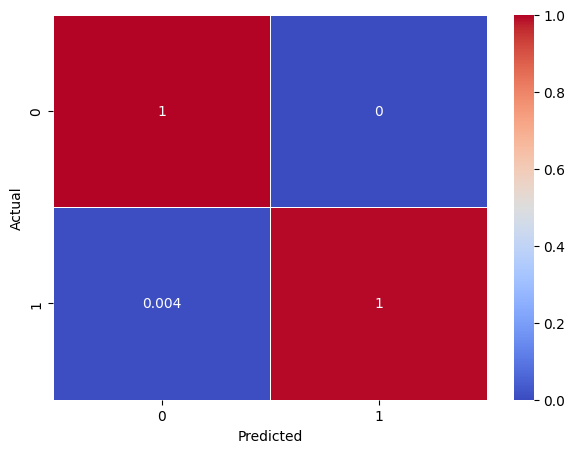

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))

sns.heatmap(conf_mx, annot=True, cmap="coolwarm", linewidth=0.5)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()